In [1]:
import numpy as np
import pandas as pd
import vaex
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
#plt.rcParams['figure.figsize'] = (20, 10)

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

pd.options.display.float_format = '{:20,.2f}'.format # suprimimos la notacion cientifica en los outputs

import warnings
warnings.filterwarnings('ignore')

In [3]:
%%time
vaex.from_csv("C:\\ESE 527\\project\\data1200n.csv",convert = True)

Wall time: 1.02 s


#,Unnamed: 0,row_id,time_id,investment_id,target,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,f_10,f_11,f_12,f_13,f_14,f_15,f_16,f_17,f_18,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28,f_29,f_30,f_31,f_32,f_33,f_34,f_35,f_36,f_37,f_38,f_39,f_40,f_41,f_42,f_43,f_44,f_45,f_46,f_47,f_48,f_49,f_50,f_51,f_52,f_53,f_54,f_55,f_56,f_57,f_58,f_59,f_60,f_61,f_62,f_63,f_64,f_65,f_66,f_67,f_68,f_69,f_70,f_71,f_72,f_73,f_74,f_75,f_76,f_77,f_78,f_79,f_80,f_81,f_82,f_83,f_84,f_85,f_86,f_87,f_88,f_89,f_90,f_91,f_92,f_93,f_94,...,f_200,f_201,f_202,f_203,f_204,f_205,f_206,f_207,f_208,f_209,f_210,f_211,f_212,f_213,f_214,f_215,f_216,f_217,f_218,f_219,f_220,f_221,f_222,f_223,f_224,f_225,f_226,f_227,f_228,f_229,f_230,f_231,f_232,f_233,f_234,f_235,f_236,f_237,f_238,f_239,f_240,f_241,f_242,f_243,f_244,f_245,f_246,f_247,f_248,f_249,f_250,f_251,f_252,f_253,f_254,f_255,f_256,f_257,f_258,f_259,f_260,f_261,f_262,f_263,f_264,f_265,f_266,f_267,f_268,f_269,f_270,f_271,f_272,f_273,f_274,f_275,f_276,f_277,f_278,f_279,f_280,f_281,f_282,f_283,f_284,f_285,f_286,f_287,f_288,f_289,f_290,f_291,f_292,f_293,f_294,f_295,f_296,f_297,f_298,f_299
0,65,0_114,0,114,-0.6688262,-0.0572759285569191,0.3648139834403991,-0.6646812558174133,-0.2838677167892456,0.202078491449356,0.1137701198458671,-1.290780782699585,0.6026122570037842,0.1148087084293365,1.0859699249267578,0.4186835289001465,-0.607047438621521,0.6349471211433411,0.6536298990249634,0.8931444883346558,0.0460067428648471,1.2462809085845947,-1.0115668773651123,-0.8532429933547974,0.3482694923877716,-2.440859317779541,1.108452320098877,0.3256591558456421,-0.0870205909013748,-0.2063129395246505,-0.0309906713664531,-0.2604328095912933,-1.813384890556336,-0.0956136211752891,-0.3995946943759918,0.4866767823696136,-0.7504661679267883,-0.5761268734931946,0.224886879324913,-0.4786555767059326,0.1038035675883293,-1.1274137496948242,0.3497301936149597,0.3978566229343414,0.031202495098114,-1.1607294082641602,0.9997833371162416,-0.5116549134254456,1.3690358400344849,0.8350855112075806,-0.2295709103345871,-1.026739478111267,0.404420793056488,-0.8407632112503052,0.9970144629478456,-0.1488874554634094,-0.4499266147613525,0.2819632887840271,-0.636272668838501,-0.7687138915061951,-0.4407666027545929,0.6312075853347778,0.8857405781745911,-0.004742638207972,-0.7957587242126465,0.6674320697784424,0.8151695132255554,-0.170442596077919,-0.1197045221924781,-0.296196699142456,-0.4849455952644348,-0.5500485301017761,1.0547422170639038,-0.6138918399810791,0.881909191608429,-0.3174969553947449,-0.4284060895442962,-0.2163146585226059,2.124112844467163,0.1483353227376938,0.2579031586647033,-1.074676752090454,-0.1082584485411644,-0.0597136318683624,-0.8003489971160889,-0.2066972106695175,-1.0615746974945068,0.735451877117157,-0.0762714073061943,0.2543533146381378,1.290854811668396,-0.7034026384353638,2.0546209812164307,-1.0830403566360474,0.4940612912178039,1.1418471336364746,0.0613128282129764,-0.6332987546920776,0.8165329694747925,-1.0058048963546753,...,0.0,-0.5885406732559204,-0.3470459282398224,0.0923226922750473,0.7762197852134705,-0.8563514351844788,-0.0624718144536018,0.5768160223960876,-0.2728176116943359,0.2184371203184127,0.6178302764892578,0.788824200630188,1.5614138841629028,0.5519441366195679,-0.8508142828941345,-0.4431447088718414,0.8974891901016235,-0.8930339217185974,-0.3924881219863891,0.7775620222091675,-0.4192670881748199,-0.0159533135592937,-0.9835265874862672,0.1278882324695587,0.0962671190500259,0.2227396368980407,0.4474260807037353,1.3942407369613647,0.477062851190567,1.1529908180236816,-0.7710472941398621,-0.2697760760784149,-0.6128349304199219,0.6670867204666138,0.6619079113006592,-0.3206600248813629,-0.4178390502929687,-0.4651711583137512,0.5438000559806824,-0.0323184877634048,-0.8069829344749451,0.1223307102918624,-0.4426693618297577,-0.8679583072662354,0.5607184171676636,-0.4383764863014221,1.1793358325958252,0.1752090454101562,-0.266669362783432,0.0505269318819046,-0.1696342229843139,1.0307090282440186,0.1942760944366455

In [4]:
train_data = vaex.open("C:\\ESE 527\\project\\data1200n.csv.hdf5")

In [5]:
pd_data = train_data.to_pandas_df()


In [6]:
print(f"Shape of train.csv is {pd_data.shape}")

Shape of train.csv is (62645, 305)


In [7]:
pd_data

,Unnamed: 0,row_id,time_id,investment_id,target,f_0,f_1,f_2,f_3,f_4,...,f_290,f_291,f_292,f_293,f_294,f_295,f_296,f_297,f_298,f_299
0,65,0_114,0,114,-0.67,-0.06,0.36,-0.66,-0.28,0.20,...,-1.63,0.91,-0.70,0.82,0.94,-0.35,1.30,1.28,-1.50,0.13
1,92,0_162,0,162,-0.04,-3.32,0.62,-0.43,-0.58,1.63,...,-0.61,-1.10,0.15,0.82,-1.06,0.58,1.30,-0.97,0.73,1.10
2,110,0_194,0,194,-0.17,-0.22,-2.15,1.09,-0.58,-0.64,...,-0.17,-1.10,-0.85,-1.22,0.94,-0.70,0.10,1.30,-1.53,-0.87
3,182,0_309,0,309,-0.74,-0.75,-1.39,0.17,-0.59,0.34,...,-0.66,-1.10,-0.53,-1.22,0.94,-0.35,0.10,0.98,-1.70,0.61
4,259,0_438,0,438,-0.84,-0.44,-0.14,0.11,-0.59,-0.30,...,1.34,-1.10,-0.02,-1.22,0.94,-0.53,-1.09,-0.81,0.21,-0.44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62640,3140827,1219_3142,1219,3142,-0.99,0.89,-1.24,1.46,-0.42,0.31,...,1.11,-1.23,-1.31,-1.14,-2.37,-0.19,-0.08,0.47,-2.12,0.93
62641,3140860,1219_3176,1219,3176,0.18,-0.54,1.75,-2.49,1.12,-0.03,...,-1.29,0.81,-0.69,0.88,0.42,0.21,-0.08,2.22,0.77,0.23
62642,3140933,1219_3257,1219,3257,0.21,-1.20,-0.07,-0.66,-0.43,-0.18,...,-0.29,0.81,-1.26,0.88,0.42,-0.66,1.36,-0.30,-0.30,-0.53
62643,3140963,1219_3287,1219,3287,-0.48,0.79,-0.33,1.59,-0.43,3.70,...,1.13,0.81,-0.84,0.88,0.42,2.03,1.36,-0.28,-1.78,5.93


In [8]:
#calculate the count for each investment_id
data1 = pd_data['investment_id']
count1 = data1.values
arr = np.count_nonzero(count1 == 15)
print(arr)
feature = pd_data.iloc[:, 5:306]
feature


0


,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,...,f_290,f_291,f_292,f_293,f_294,f_295,f_296,f_297,f_298,f_299
0,-0.06,0.36,-0.66,-0.28,0.20,0.11,-1.29,0.60,0.11,1.09,...,-1.63,0.91,-0.70,0.82,0.94,-0.35,1.30,1.28,-1.50,0.13
1,-3.32,0.62,-0.43,-0.58,1.63,1.69,1.32,0.60,0.11,-0.24,...,-0.61,-1.10,0.15,0.82,-1.06,0.58,1.30,-0.97,0.73,1.10
2,-0.22,-2.15,1.09,-0.58,-0.64,0.96,-1.16,1.72,0.11,0.37,...,-0.17,-1.10,-0.85,-1.22,0.94,-0.70,0.10,1.30,-1.53,-0.87
3,-0.75,-1.39,0.17,-0.59,0.34,-1.08,-1.19,-0.72,0.11,1.13,...,-0.66,-1.10,-0.53,-1.22,0.94,-0.35,0.10,0.98,-1.70,0.61
4,-0.44,-0.14,0.11,-0.59,-0.30,-1.14,-0.71,1.44,0.11,-0.77,...,1.34,-1.10,-0.02,-1.22,0.94,-0.53,-1.09,-0.81,0.21,-0.44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62640,0.89,-1.24,1.46,-0.42,0.31,-0.84,-2.08,2.38,0.06,0.43,...,1.11,-1.23,-1.31,-1.14,-2.37,-0.19,-0.08,0.47,-2.12,0.93
62641,-0.54,1.75,-2.49,1.12,-0.03,0.28,1.16,-0.09,0.06,0.58,...,-1.29,0.81,-0.69,0.88,0.42,0.21,-0.08,2.22,0.77,0.23
62642,-1.20,-0.07,-0.66,-0.43,-0.18,-0.12,-1.05,1.21,0.06,1.01,...,-0.29,0.81,-1.26,0.88,0.42,-0.66,1.36,-0.30,-0.30,-0.53
62643,0.79,-0.33,1.59,-0.43,3.70,0.68,-1.42,0.69,0.06,-0.93,...,1.13,0.81,-0.84,0.88,0.42,2.03,1.36,-0.28,-1.78,5.93


In [12]:
from sklearn.decomposition import PCA
aa = PCA(0.8)
bb = aa.fit_transform(feature)

In [13]:
newdata_Df = pd.DataFrame(data = bb)
newdata_Df

,0,1,2,3,4,5,6,7,8,9,...,46,47,48,49,50,51,52,53,54,55
0,2.21,-4.84,-1.70,0.57,-5.12,1.16,1.34,-2.06,-0.30,3.03,...,-0.12,0.06,0.33,-0.71,1.45,-0.77,2.03,-1.15,0.99,-0.58
1,6.27,-1.50,-5.77,-4.37,2.51,-0.92,2.60,-1.92,-0.36,0.02,...,-1.00,0.64,-0.86,0.31,-0.61,1.87,-1.60,-0.58,-1.03,1.02
2,-7.39,5.79,11.54,-0.38,-4.01,1.39,0.26,2.30,-0.50,-1.59,...,-2.99,0.62,1.18,1.28,0.31,1.78,0.79,-1.78,-0.30,-1.55
3,1.81,-0.19,-3.01,0.24,-7.34,0.39,-0.09,0.65,-0.53,-1.58,...,0.39,0.58,-1.90,0.46,0.61,-0.70,1.61,-0.68,1.15,-0.41
4,-2.41,2.93,-4.43,-1.89,1.77,-3.58,-2.42,0.94,0.46,-0.75,...,-0.60,-1.16,-0.86,0.18,-0.58,-1.25,0.04,0.70,1.44,-0.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62640,4.72,1.59,6.19,-6.74,-9.39,-3.36,0.70,-2.15,0.00,-1.19,...,-0.31,0.84,-0.58,1.53,-0.62,1.25,0.82,2.20,1.85,0.55
62641,3.69,-13.06,-1.46,1.34,-1.16,4.01,0.55,-0.82,0.06,-1.00,...,0.55,-1.77,-0.40,-0.55,-0.88,-0.29,0.92,0.77,2.82,1.86
62642,-5.34,3.09,-0.02,4.72,2.55,0.79,1.17,-0.55,0.14,2.50,...,-0.34,0.85,-0.37,-0.82,0.34,0.58,-0.20,-0.37,-1.32,1.18
62643,15.99,1.14,-3.63,-5.16,-7.17,-1.21,-1.87,-3.12,2.52,2.13,...,0.52,0.79,-2.95,-2.22,-1.91,2.40,-0.72,2.74,0.02,0.88


In [14]:
print('Explained variation per principal component: {}'.format(aa.explained_variance_ratio_))
print(sum(aa.explained_variance_ratio_))

Explained variation per principal component: [0.22728569 0.0888871  0.07076059 0.05454217 0.03861876 0.02718645
 0.02266937 0.01947725 0.01497331 0.01342316 0.01247849 0.01203633
 0.01040656 0.00946829 0.00846936 0.00800749 0.0075614  0.00724948
 0.00680037 0.00657666 0.00603577 0.00580525 0.00556677 0.00541734
 0.00505754 0.0048843  0.00477661 0.00469403 0.00465533 0.00428149
 0.00419352 0.00408331 0.00397974 0.00382566 0.00378152 0.00366984
 0.00359941 0.00358978 0.00348044 0.00333247 0.00329405 0.00323744
 0.00320676 0.00312165 0.00308631 0.00299923 0.00293028 0.00290643
 0.00288743 0.00285987 0.00282348 0.00274342 0.00269975 0.00265127
 0.00263153 0.00258312]
0.8022504553635524


In [67]:
df1 = pd_data
df1 = df1[df1["investment_id"] == 162]

df_1 = df1.iloc[0:10, 5:306]
#df_1
#df

In [17]:
#example
#df1 = pd_data
#df1 = df1[df1["investment_id"] == 114]
#df1.drop([52])

,Unnamed: 0,row_id,time_id,investment_id,target,f_0,f_1,f_2,f_3,f_4,...,f_290,f_291,f_292,f_293,f_294,f_295,f_296,f_297,f_298,f_299
0,65,0_114,0,114,-0.67,-0.06,0.36,-0.66,-0.28,0.20,...,-1.63,0.91,-0.70,0.82,0.94,-0.35,1.30,1.28,-1.50,0.13
104,4613,2_114,2,114,0.01,0.11,0.31,0.00,-0.60,0.15,...,0.47,-1.28,0.04,0.73,0.71,-0.26,1.31,-0.89,-1.66,0.11
156,6888,3_114,3,114,0.07,0.19,0.11,-0.07,-0.53,0.14,...,0.36,-1.26,-0.98,0.77,0.44,-0.11,-1.07,-0.31,-1.71,0.08
206,9171,4_114,4,114,0.03,0.44,0.30,0.63,-0.52,0.15,...,0.47,-0.58,-0.92,0.47,1.75,-0.23,0.68,-0.30,-1.59,0.11
258,11446,5_114,5,114,0.56,0.73,0.39,0.41,-0.56,0.15,...,0.25,-0.91,-0.54,0.25,-0.86,-0.08,-0.20,-0.84,-1.59,0.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62385,3124371,1215_114,1215,114,0.28,0.65,-0.55,1.03,-0.43,-0.02,...,0.21,-0.69,-0.74,0.77,0.97,-0.38,-0.08,-0.07,-0.94,-0.16
62437,3127802,1216_114,1216,114,-0.21,0.72,-0.64,1.14,-0.45,-0.03,...,-0.20,-0.73,-0.79,-1.16,0.86,-0.37,0.94,-0.58,-0.93,-0.31
62489,3131220,1217_114,1217,114,0.62,0.41,-0.74,0.90,-0.37,-0.03,...,0.63,0.61,-1.09,0.41,-1.48,-0.21,-0.74,-0.35,-0.92,-0.33
62541,3134641,1218_114,1218,114,0.37,0.14,-0.76,0.92,-0.43,-0.02,...,0.66,-0.82,-0.95,0.48,-1.03,-0.30,-0.13,-0.35,-1.29,-0.33


In [69]:
df1 = pd_data
df1 = df1[df1["investment_id"] == 114]
#df
df_1 = df1.iloc[:,2:306]
df_1
df_1.to_csv("C:\\ESE 527\\project\\investment114.csv", index=False)  

In [70]:
#masked nonexisted value
timeidd = df_1.iloc[:,0].values
count = timeidd[0]
end = timeidd[-1]
def find_missing(lst):
    return [x for x in range(lst[0], lst[-1]+1) 
                               if x not in lst]
miss = find_missing(timeidd)
miss


[225,
 228,
 233,
 255,
 361,
 368,
 369,
 370,
 371,
 372,
 382,
 402,
 403,
 447,
 489,
 544,
 704,
 706,
 713]

In [71]:
def fill(data,investment_id):
    data = pd.read_csv("C:\\ESE 527\\project\\investment114.csv")
    time_id = data.iloc[:,0]
    miss_id = []
    for i in range(1220):
        if time_id[i] != i:
            
            df2 = pd.DataFrame([[i,investment_id,0] + [0]*300],columns = data.columns)
            data = data.append(df2,ignore_index= False)
            data = data.sort_index().reset_index(drop=True)
            time_id = data.iloc[:,0]
            miss_id.append(i)
            
    return data.sort_values(by='time_id'),miss_id
(new_data, miss) = fill(df_1,114)
use_data = new_data.iloc[:,2:304]
use_data
miss

[225,
 228,
 233,
 255,
 361,
 368,
 369,
 370,
 371,
 372,
 382,
 402,
 403,
 447,
 489,
 544,
 704,
 706,
 713]

In [72]:
#Kalman-Filter smoothing（需要安装pyKalman包）
from pykalman import KalmanFilter
import numpy as np
mat = use_data.iloc[0].values
for i in range(1,1220):
    mat_t = use_data.iloc[i].values 
    mat = np.vstack((mat,mat_t))
#mat[1] = ma.masked
#print(mat)
#kf1 = kf.em([2,mat])
kf1 = KalmanFilter(n_dim_state=301, n_dim_obs=301)
kf1 = kf1.em(mat,n_iter=10)
(filtered_state_means, filtered_state_covariances) = kf1.filter(mat)
(smoothed_state_means, smoothed_state_covariances) = kf1.smooth(mat)
#print(smoothed_state_means[225])

In [73]:
#imputing the missing data
for i in miss:
    use_data.iloc[i] = smoothed_state_means[i]

1220
0                     -0.67
20                     0.02
21                     0.01
22                     0.07
23                     0.03
               ...         
1215                   0.28
1216                  -0.21
1217                   0.62
1218                   0.37
1219                  -0.24
Name: target, Length: 1220, dtype: float64


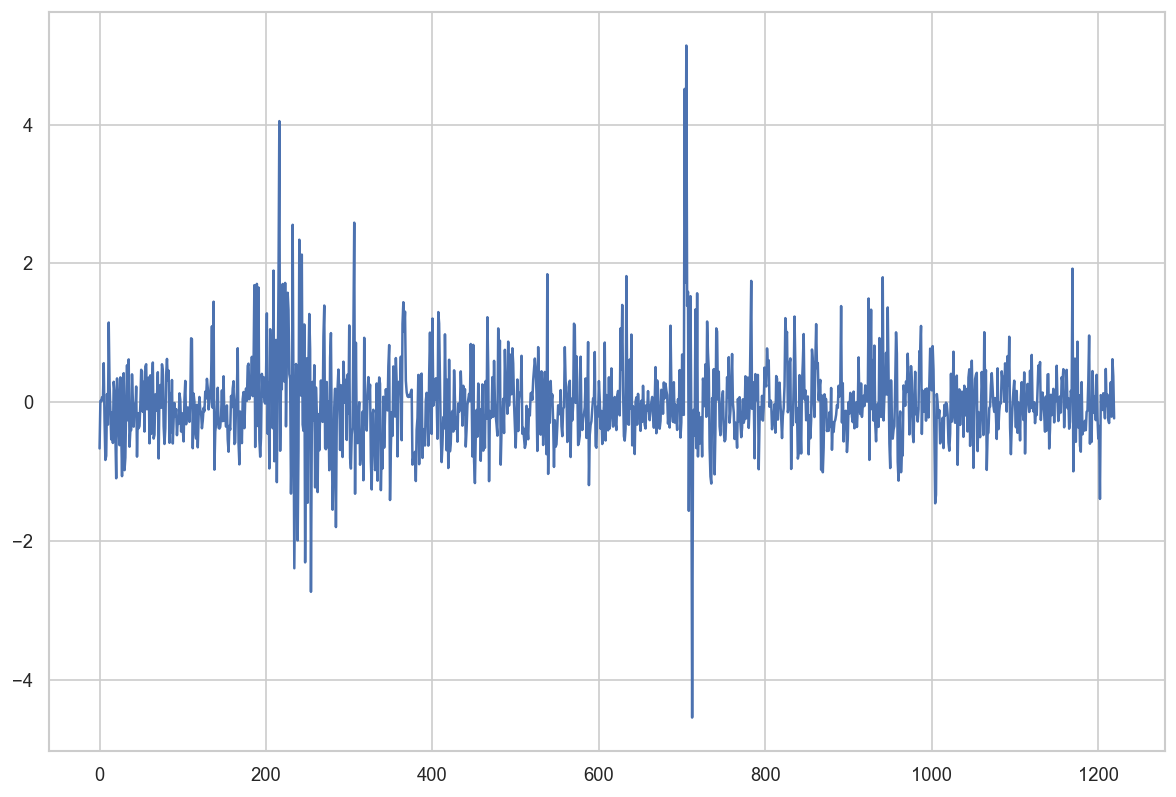

In [74]:
#show the target value with time
print(use_data.iloc[:,0].shape[0])
print(use_data.iloc[:,0])
#plt.plot(use_data.iloc[:,0])
time = []
for i in range(0,1220):
    time.append(i)
plt.plot(time,use_data.iloc[:,0].values)

In [76]:
#output csv
#use_data
use_data.to_csv("C:\\ESE 527\\project\\filleddata114.csv", index=False) 
use_data

,target,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,...,f_290,f_291,f_292,f_293,f_294,f_295,f_296,f_297,f_298,f_299
0,-0.67,-0.06,0.36,-0.66,-0.28,0.20,0.11,-1.29,0.60,0.11,...,-1.63,0.91,-0.70,0.82,0.94,-0.35,1.30,1.28,-1.50,0.13
20,0.02,0.12,0.42,-0.20,-0.46,0.18,0.04,-0.90,0.62,0.17,...,-0.33,-1.08,-0.74,0.58,-1.19,-0.29,0.03,-0.04,-1.61,0.14
21,0.01,0.11,0.31,0.00,-0.60,0.15,0.02,-0.52,0.49,0.14,...,0.47,-1.28,0.04,0.73,0.71,-0.26,1.31,-0.89,-1.66,0.11
22,0.07,0.19,0.11,-0.07,-0.53,0.14,-0.73,-0.19,0.37,0.08,...,0.36,-1.26,-0.98,0.77,0.44,-0.11,-1.07,-0.31,-1.71,0.08
23,0.03,0.44,0.30,0.63,-0.52,0.15,-0.31,0.19,0.21,0.17,...,0.47,-0.58,-0.92,0.47,1.75,-0.23,0.68,-0.30,-1.59,0.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1215,0.28,0.65,-0.55,1.03,-0.43,-0.02,0.77,-0.77,1.94,0.09,...,0.21,-0.69,-0.74,0.77,0.97,-0.38,-0.08,-0.07,-0.94,-0.16
1216,-0.21,0.72,-0.64,1.14,-0.45,-0.03,1.18,-0.55,1.95,0.15,...,-0.20,-0.73,-0.79,-1.16,0.86,-0.37,0.94,-0.58,-0.93,-0.31
1217,0.62,0.41,-0.74,0.90,-0.37,-0.03,0.80,-0.07,1.96,0.12,...,0.63,0.61,-1.09,0.41,-1.48,-0.21,-0.74,-0.35,-0.92,-0.33
1218,0.37,0.14,-0.76,0.92,-0.43,-0.02,0.37,0.35,1.85,0.06,...,0.66,-0.82,-0.95,0.48,-1.03,-0.30,-0.13,-0.35,-1.29,-0.33


In [83]:
#split train and test
use_data = pd.read_csv("C:\\ESE 527\\project\\filleddata194.csv")
train_data = use_data[0:1170]
test_data = use_data[1170:1220]
train_data.to_csv("C:\\ESE 527\\project\\filled_train_data194.csv", index=False) 
test_data.to_csv("C:\\ESE 527\\project\\filled_test_data194.csv", index=False) 

In [85]:
#do pca
from sklearn.decomposition import PCA
datata = pd.read_csv("C:\\ESE 527\\project\\filled_train_data194.csv")
target0 = datata.iloc[:,0]
features1 = datata.iloc[:,1:301]
testtt = pd.read_csv("C:\\ESE 527\\project\\filled_test_data194.csv")
testtt0 = testtt.iloc[:,0]
testtt1 = testtt.iloc[:,1:301]
aa = PCA(0.8)
PCA_feat1 = aa.fit_transform(features1)
PCA_test1 = aa.transform(testtt1)
feat11 = pd.DataFrame(PCA_feat1)
test11 = pd.DataFrame(PCA_test1)
train_final = pd.concat([target0,feat11],axis=1)
test_final = pd.concat([testtt0,test11],axis=1)

train_final.to_csv("C:\\ESE 527\\project\\filled_train_data194_PCA08.csv", index=False) 
test_final.to_csv("C:\\ESE 527\\project\\filled_test_data194_PCA08.csv", index=False) 

#predScores = pd.concat([dfcolumns,dfscores],axis=1)

In [86]:
#reload data
use_data = pd.read_csv("C:\\ESE 527\\project\\filled_train_data194.csv")

In [183]:
trainx_scaled1 = pd.read_csv("C:\\ESE 527\\project\\train_X.csv")
trainy_scaled1 = pd.read_csv("C:\\ESE 527\\project\\train_y.csv")
testx_scaled1 = pd.read_csv("C:\\ESE 527\\project\\test_X.csv")
testy_scaled1 = pd.read_csv("C:\\ESE 527\\project\\test_Y.csv")
trainx_scaled = trainx_scaled1.iloc[:,1:301]
trainy_scaled = trainy_scaled1.iloc[:,1]
testx_scaled = testx_scaled1.iloc[:,1:301]
testy_scaled = testy_scaled1.iloc[:,1]
use_train = pd.concat([trainy_scaled,trainx_scaled],axis=1)
use_test = pd.concat([testy_scaled,testx_scaled],axis=1)
qq = PCA(0.9)
PCA_X_train = qq.fit_transform(trainx_scaled)
PCA_X_test = qq.transform(testx_scaled)
PCA_X_tr = pd.DataFrame(PCA_X_train)
PCA_X_te = pd.DataFrame(PCA_X_test)
PCA_train_final = pd.concat([trainy_scaled,PCA_X_tr],axis=1)
PCA_test_final = pd.concat([testy_scaled,PCA_X_te],axis=1)
PCA_train_final.to_csv("C:\\ESE 527\\project\\scaled_filled_train_data194_PCA09.csv", index=False) 
PCA_test_final.to_csv("C:\\ESE 527\\project\\scaled_filled_test_data194_PCA09.csv", index=False) 

In [185]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
use_data = use_train
target = use_data.iloc[:,0].values
result = adfuller(target)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print(result)
#so from ADF test the target is stationary

ADF Statistic: -10.532364
p-value: 0.000000
(-10.532363875080083, 9.082394111929125e-19, 7, 1192, {'1%': -3.4358478507713777, '5%': -2.863967751840151, '10%': -2.568062580992973}, -1638.0390389653162)


In [186]:
from statsmodels.stats.diagnostic import acorr_ljungbox
result12 = acorr_ljungbox(target, lags=[12], return_df=True)
result6 = acorr_ljungbox(target, lags=[6], return_df=True)
print(result12)
print(result6)
#we see a p-value much smaller than .01, thus we can reject the null hypothesis, indicating the time series does contain an autocorrelation.

                lb_stat            lb_pvalue
12                80.23                 0.00
               lb_stat            lb_pvalue
6                60.58                 0.00


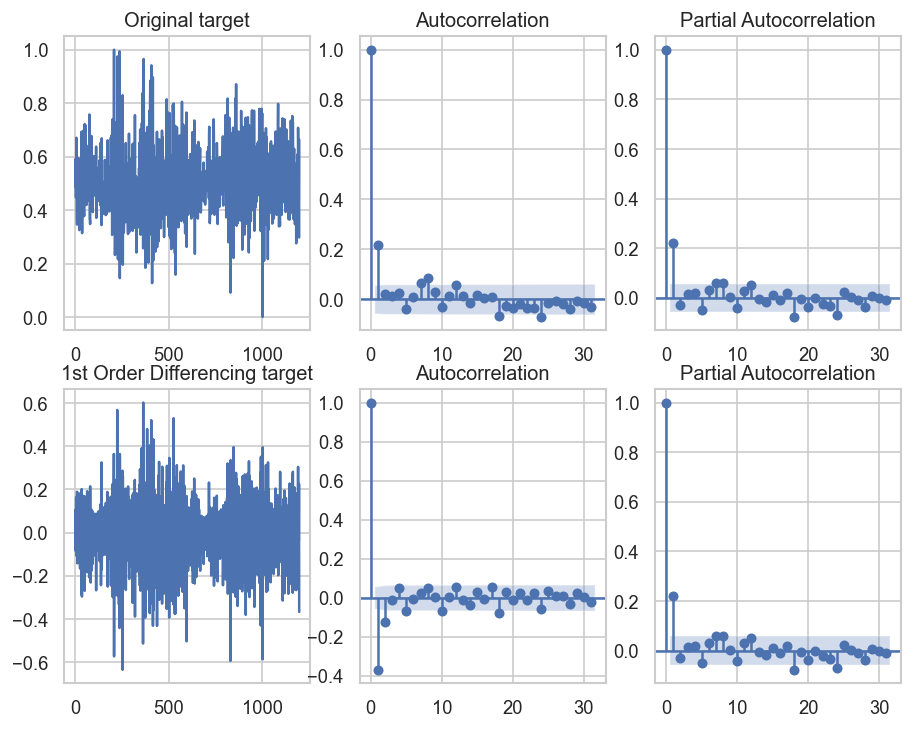

In [187]:
#plot the difference plots
import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

# Original Series
fig, axes = plt.subplots(2, 3)
axes[0, 0].plot(target); axes[0, 0].set_title('Original target')
plot_acf(target, ax=axes[0, 1])
plot_pacf(target, ax=axes[0, 2])

# 1st Differencing
axes[1, 0].plot(np.diff(target)); axes[1, 0].set_title('1st Order Differencing target')
plot_acf(np.diff(target), ax=axes[1, 1])
plot_pacf(target, ax=axes[1, 2])
plt.show()

In [188]:
#AIC定阶
warnings.filterwarnings("ignore") # specify to ignore warning messages
import pandas as pd 
import numpy as np
import seaborn as sns #热力图
import itertools 
import datetime
import matplotlib.pyplot as plt #画图
import statsmodels.api as sm 
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller #ADF检验
from statsmodels.stats.diagnostic import acorr_ljungbox #白噪声检验
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf #画图定阶
from statsmodels.tsa.arima_model import ARIMA #ARIMA模型
from statsmodels.tsa.arima_model import ARMA #ARMA模型
from statsmodels.stats.stattools import durbin_watson #DW检验
from statsmodels.graphics.api import qqplot #qq图

def detetminante_order_AIC(timeseries): #信息准则定阶：AIC、BIC、HQIC
    #AIC
    AIC = sm.tsa.arma_order_select_ic(timeseries,\
        max_ar=6,max_ma=4,ic='aic')['aic_min_order']
    #BIC
    BIC = sm.tsa.arma_order_select_ic(timeseries,max_ar=6,\
           max_ma=4,ic='bic')['bic_min_order']
    #HQIC
    HQIC = sm.tsa.arma_order_select_ic(timeseries,max_ar=6,\
                 max_ma=4,ic='hqic')['hqic_min_order']
    print('the AIC is{},\nthe BIC is{},\n the HQIC is{}'.format(AIC,BIC,HQIC))
    
 
def heatmap_AIC(timeseries):
    #设置遍历循环的初始条件，以热力图的形式展示，原理同AIC，BIC，HQIC定阶
    p_min = 0
    q_min = 0
    p_max = 5
    q_max = 5
    d_min = 0
    d_max = 5
    # 创建Dataframe,以BIC准则
    results_aic = pd.DataFrame(index=['AR{}'.format(i) \
                               for i in range(p_min,p_max+1)],\
            columns=['MA{}'.format(i) for i in range(q_min,q_max+1)])
    # itertools.product 返回p,q中的元素的笛卡尔积的元组
    for p,d,q in itertools.product(range(p_min,p_max+1),\
                                   range(d_min,d_max+1),range(q_min,q_max+1)):
        if p==0 and q==0:
            results_aic.loc['AR{}'.format(p), 'MA{}'.format(q)] = np.nan
            continue
        try:
            model = sm.tsa.ARIMA(timeseries, order=(p, d, q))
            results = model.fit()
            #返回不同pq下的model的BIC值
            results_aic.loc['AR{}'.format(p), 'MA{}'.format(q)] = results.aic
        except:
            continue
    results_aic = results_aic[results_aic.columns].astype(float)
    #print(results_bic)
    
    fig, ax = plt.subplots(figsize=(10, 8))
    ax = sns.heatmap(results_aic,
                 #mask=results_aic.isnull(),
                 ax=ax,
                 annot=True, #将数字显示在热力图上
                 fmt='.2f',
                 )
    ax.set_title('AIC')
    plt.show()

detetminante_order_AIC(target)


the AIC is(6, 4),
the BIC is(0, 1),
 the HQIC is(0, 1)


In [155]:
#heatmap_AIC(target)

MSE of training dataset is 0.014027948746686076
MSE of testing dataset is 0.05266887544901764


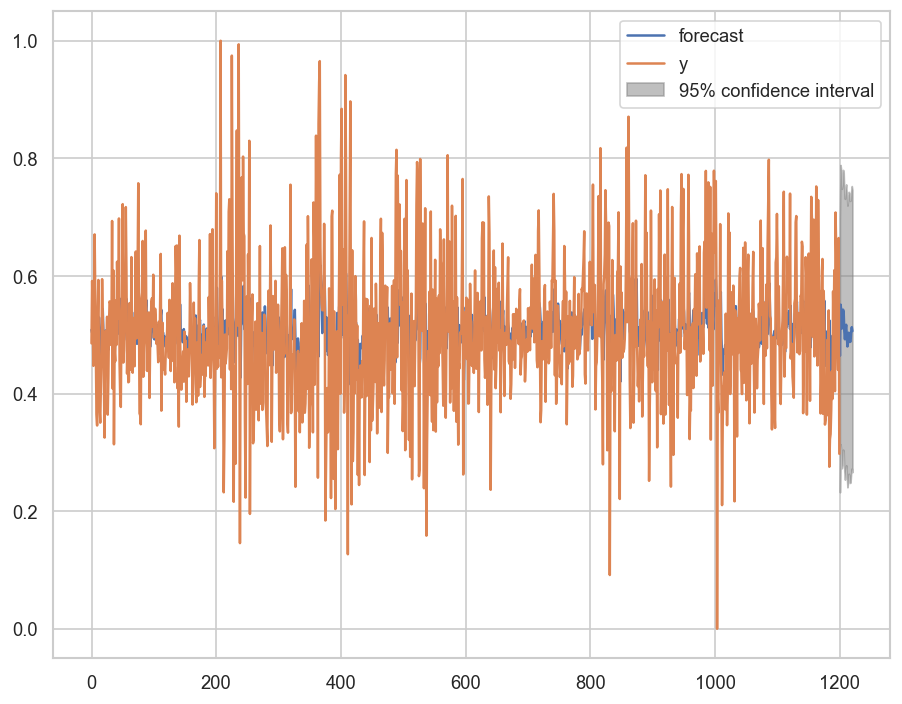

In [190]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
model = ARIMA(target, order=(6, 0, 4))
results = model.fit()
results.plot_predict(0, 1220)
#testing = pd.read_csv("C:\\ESE 527\\project\\filled_test_data194.csv")
testing = use_test
test_arima = testing.iloc[:,0].values
pred_train = results.predict(0,1199)
pred_test = results.forecast(20)[0]
MSE_train = (mean_squared_error(pred_train, target))
MSE_test = (mean_squared_error(pred_test, test_arima))
print('MSE of training dataset is', MSE_train)
print('MSE of testing dataset is', MSE_test)


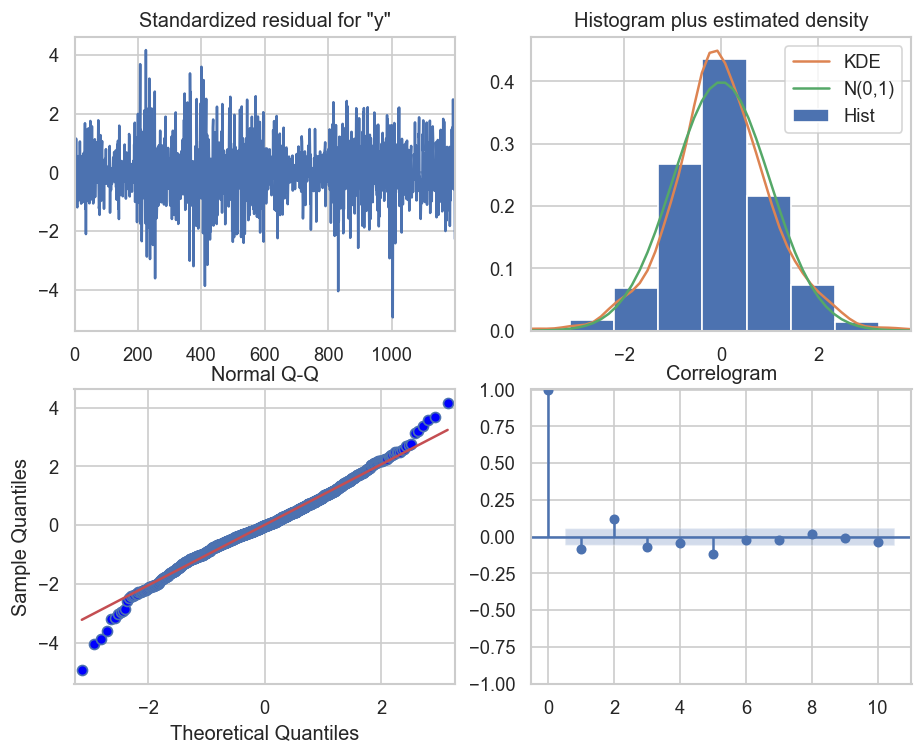

<Figure size 2400x2400 with 0 Axes>

In [191]:
model = sm.tsa.statespace.SARIMAX(target, order=(6, 0, 4))
results = model.fit()
results.plot_diagnostics()
plt.figure(figsize=(20,20))
plt.show()

In [192]:
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1200
Model:               SARIMAX(6, 0, 4)   Log Likelihood                 793.970
Date:                Sat, 07 May 2022   AIC                          -1565.941
Time:                        22:27:35   BIC                          -1509.950
Sample:                             0   HQIC                         -1544.850
                               - 1200                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3561      0.045      7.961      0.000       0.268       0.444
ar.L2         -0.2871      0.051     -5.598      0.000      -0.388      -0.187
ar.L3         -0.0537      0.058     -0.919      0.3

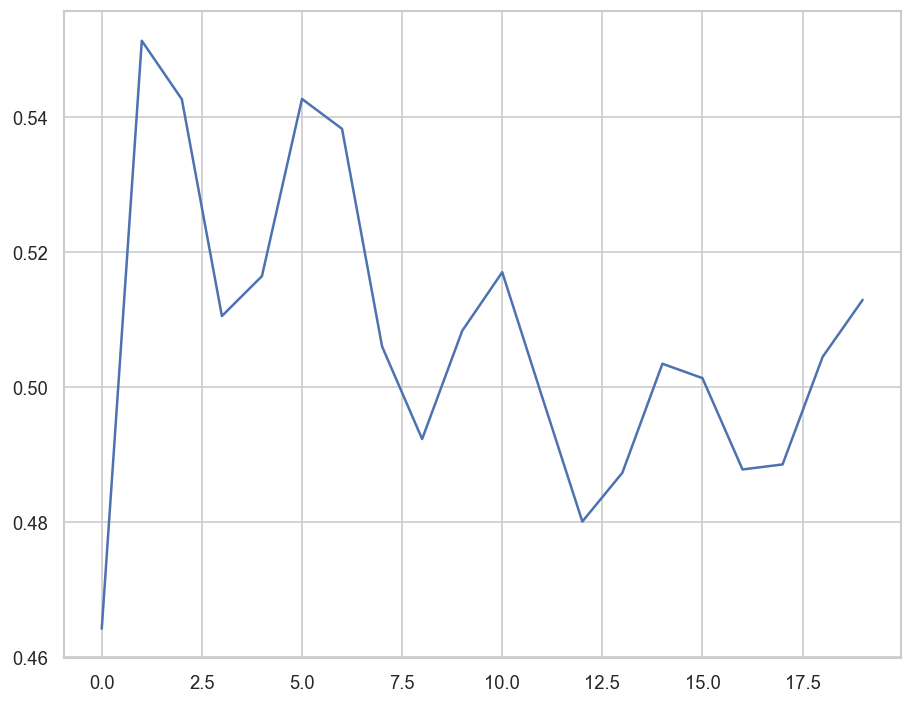

In [193]:
plt.plot(pred_test)

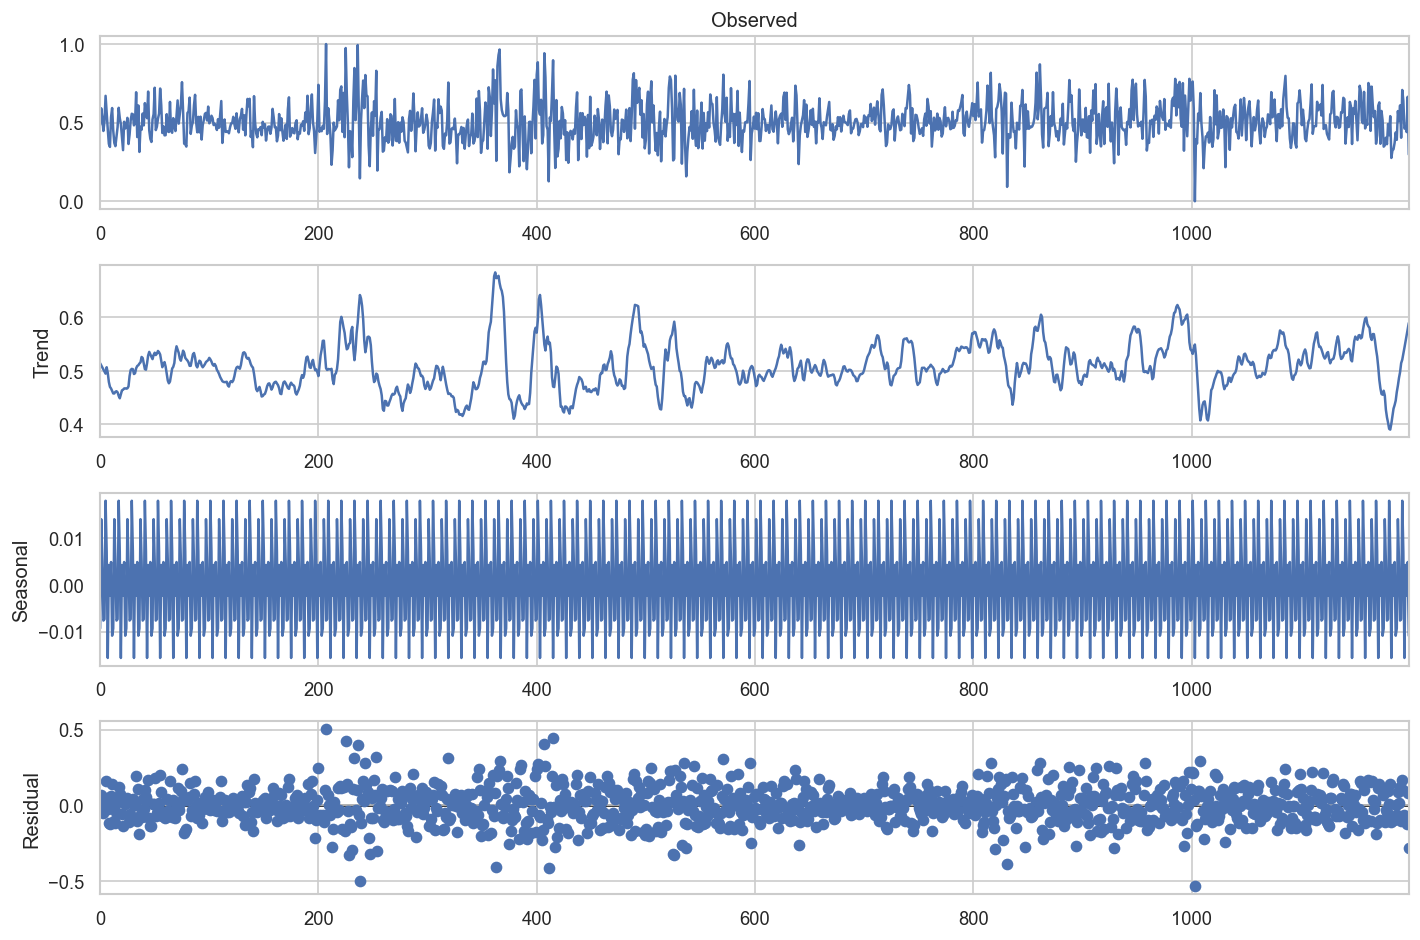

In [194]:
#seasonal arima
#check season
from pylab import rcParams
import statsmodels.api as sm
decomposition = sm.tsa.seasonal_decompose(target, model='additive', extrapolate_trend='freq',period= 12)  
plt.rc('figure',figsize=(12,8))
fig = decomposition.plot()
plt.show()
#we find that the data has some seasonal trends


In [195]:
import pmdarima as pm
built_arimamodel = pm.auto_arima(target,
                                 start_p=0,   # p最小值
                                 start_q=0,   # q最小值
                                 test='adf',  # ADF检验确认差分阶数d
                                 max_p=6,     # p最大值
                                 max_q=6,     # q最大值
                                 m=12,        # 季节性周期长度，当m=1时则不考虑季节性
                                 d=None,      # 通过函数来计算d
                                 seasonal=True, start_P=0, D=0, trace=True,
                                 error_action='ignore', suppress_warnings=True,
                                 stepwise=False  # stepwise为False则不进行完全组合遍历
                                 )
print(built_arimamodel.summary())


 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=-1623.810, Time=0.10 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : AIC=-1626.141, Time=0.28 sec
 ARIMA(0,0,0)(0,0,2)[12] intercept   : AIC=-1630.944, Time=1.21 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : AIC=-1625.480, Time=0.68 sec
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=inf, Time=1.61 sec
 ARIMA(0,0,0)(1,0,2)[12] intercept   : AIC=inf, Time=6.08 sec
 ARIMA(0,0,0)(2,0,0)[12] intercept   : AIC=-1630.325, Time=4.82 sec
 ARIMA(0,0,0)(2,0,1)[12] intercept   : AIC=inf, Time=6.44 sec
 ARIMA(0,0,0)(2,0,2)[12] intercept   : AIC=inf, Time=5.84 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=-1681.436, Time=0.15 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=-1683.305, Time=0.53 sec
 ARIMA(0,0,1)(0,0,2)[12] intercept   : AIC=-1687.574, Time=2.64 sec
 ARIMA(0,0,1)(1,0,0)[12] intercept   : AIC=-1682.736, Time=1.13 sec
 ARIMA(0,0,1)(1,0,1)[12] intercept   : AIC=inf, Time=2.03 sec
 ARIMA(0,0,1)(1,0,2)[12] intercept   : AIC=inf, Time=7.93 sec
 ARIMA(0,0,1)(2,

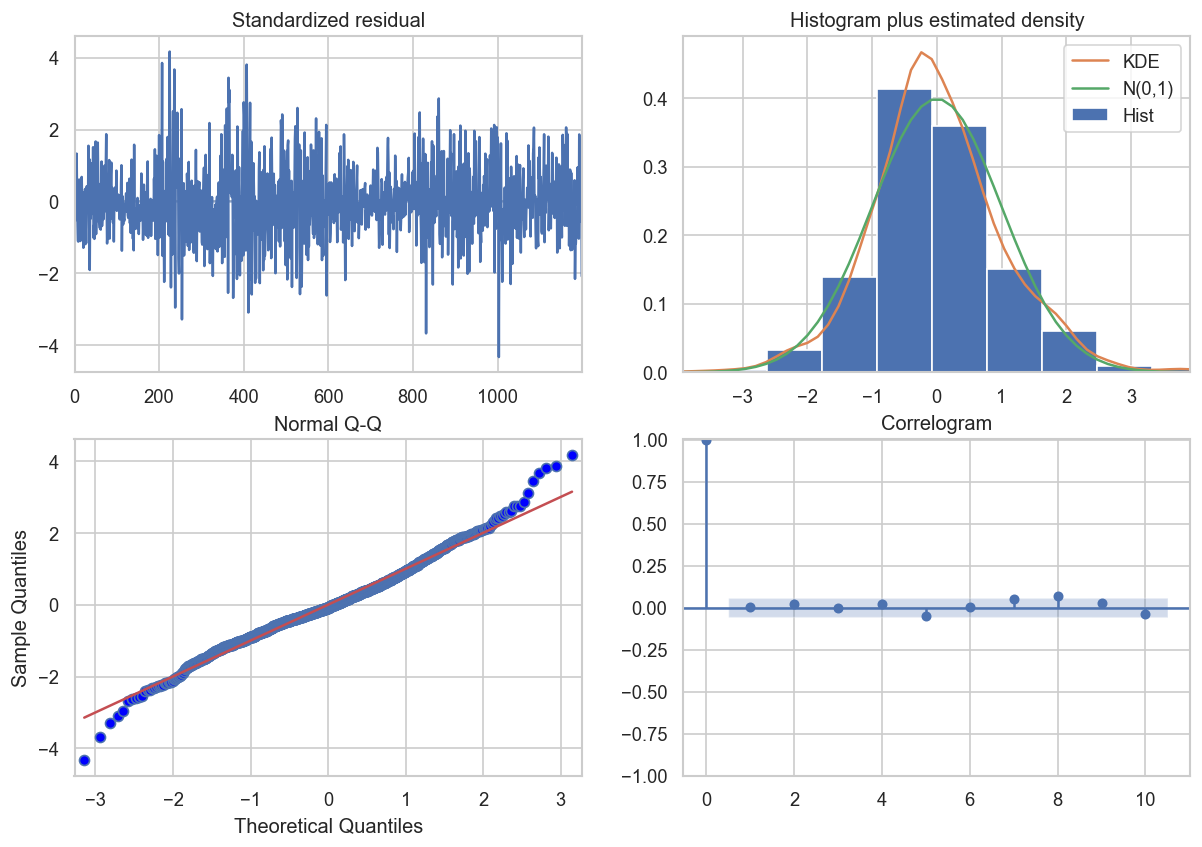

<Figure size 2400x2400 with 0 Axes>

In [196]:
built_arimamodel.plot_diagnostics()
plt.figure(figsize=(20,20))
plt.show()

MSE of training dataset is 0.051010305054169945
MSE of testing dataset is 0.14354133826719181


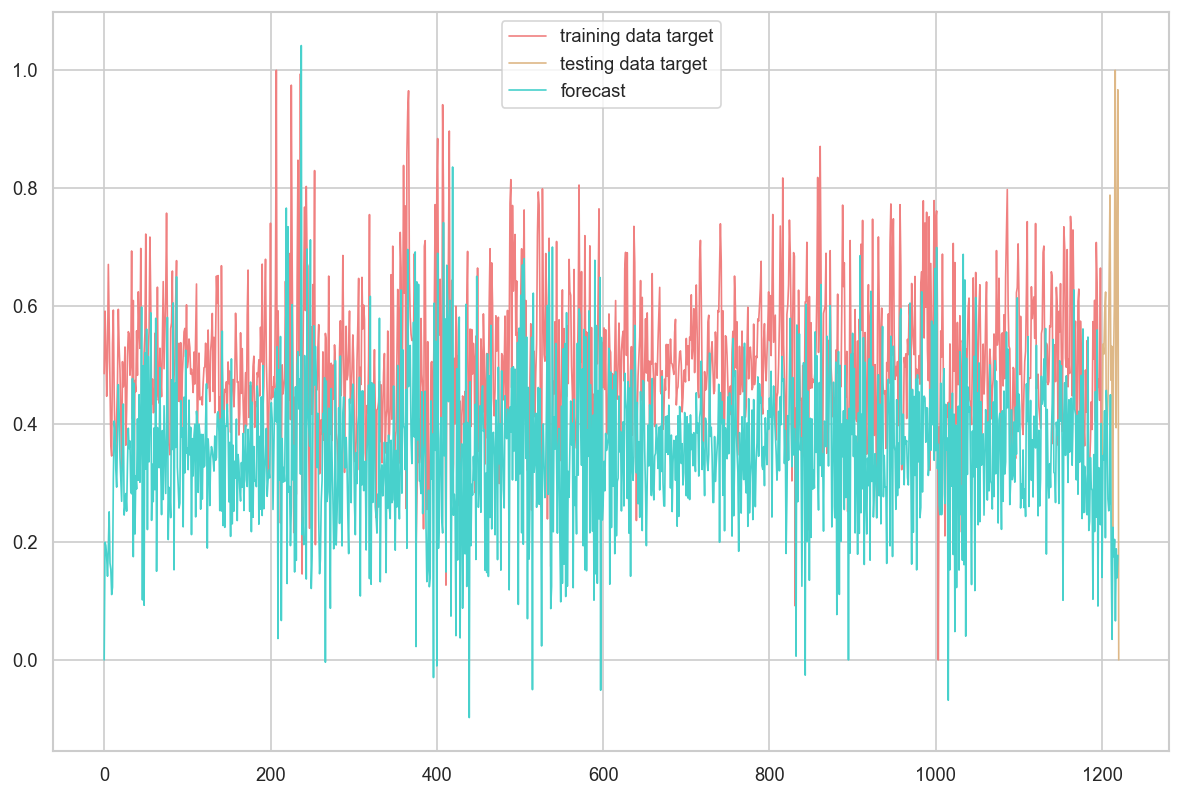

In [198]:
#calculate the best Sarima model
sarima = sm.tsa.statespace.SARIMAX(target, order = (0,0,1), seasonal_order=(0, 0, 2, 12))
result_sarima = sarima.fit()
#pppp = result_sarima.predict(0,1169)
pred_train1 = result_sarima.predict(0,1199)
pred_test1 = result_sarima.predict(1200,1219)
MSE_train1 = (mean_squared_error(pred_train1, target))
MSE_test1 = (mean_squared_error(pred_test1, test_arima))
print('MSE of training dataset is', MSE_train1)
print('MSE of testing dataset is', MSE_test1)
all_train = target
all_pred = result_sarima.predict(0,1219)


plt.plot(all_train, color="lightcoral", linewidth=1.0, label=r"training data target")
plt.plot(np.linspace(1200,1220,20), test_arima, color="burlywood", linewidth=1.0, label=r"testing data target")
plt.plot(all_pred, color="mediumturquoise", linewidth=1.0, label=r"forecast")
plt.legend(loc="best")
plt.show()

In [200]:
#SARiMAX
use_data
features = use_data.iloc[:,1:301]
arimax = sm.tsa.statespace.SARIMAX(target, exog = features, order = (0,0,1), seasonal_order=(0, 0, 2, 12))
result2 = arimax.fit()

#print(arimax.summary())

In [201]:
test_feat = testing.iloc[:,1:301]
all_feat = np.vstack((features,test_feat))
all_feat1 = pd.DataFrame(all_feat)

MSE of training dataset is 0.008588957235674478
MSE of testing dataset is 0.1109226507080417


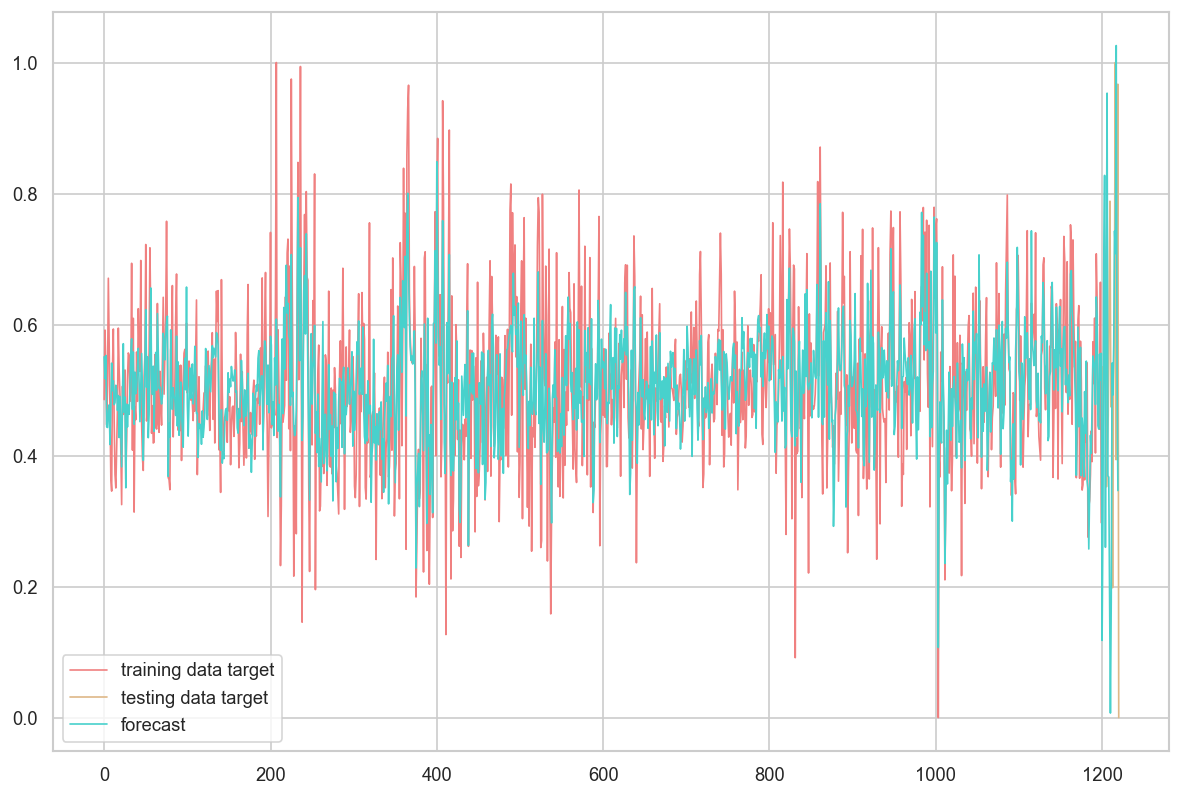

In [202]:
#pred2 = result1.predict(1,1220)
pred3 = result2.predict(start = 0, end = 1199 ,exog = features)
pred_test1 = result2.predict(start = 1200, end = 1219, exog = test_feat)
MSE_train2 = (mean_squared_error(pred3, target))
MSE_test2= (mean_squared_error(pred_test1, test_arima))
print('MSE of training dataset is', MSE_train2)
print('MSE of testing dataset is', MSE_test2)
all_train1 = target
all_pred1 = result2.predict(start= 0, end = 1219, exog = test_feat)

plt.plot(all_train1, color="lightcoral", linewidth=1.0, label=r"training data target")
plt.plot(np.linspace(1200,1220,20), test_arima, color="burlywood", linewidth=1.0, label=r"testing data target")
plt.plot(all_pred1, color="mediumturquoise", linewidth=1.0, label=r"forecast")
plt.legend(loc="best")
plt.show()
#plot
#print(result1.summary())
#value_p = pred2.values
#plt.plot(value_p)

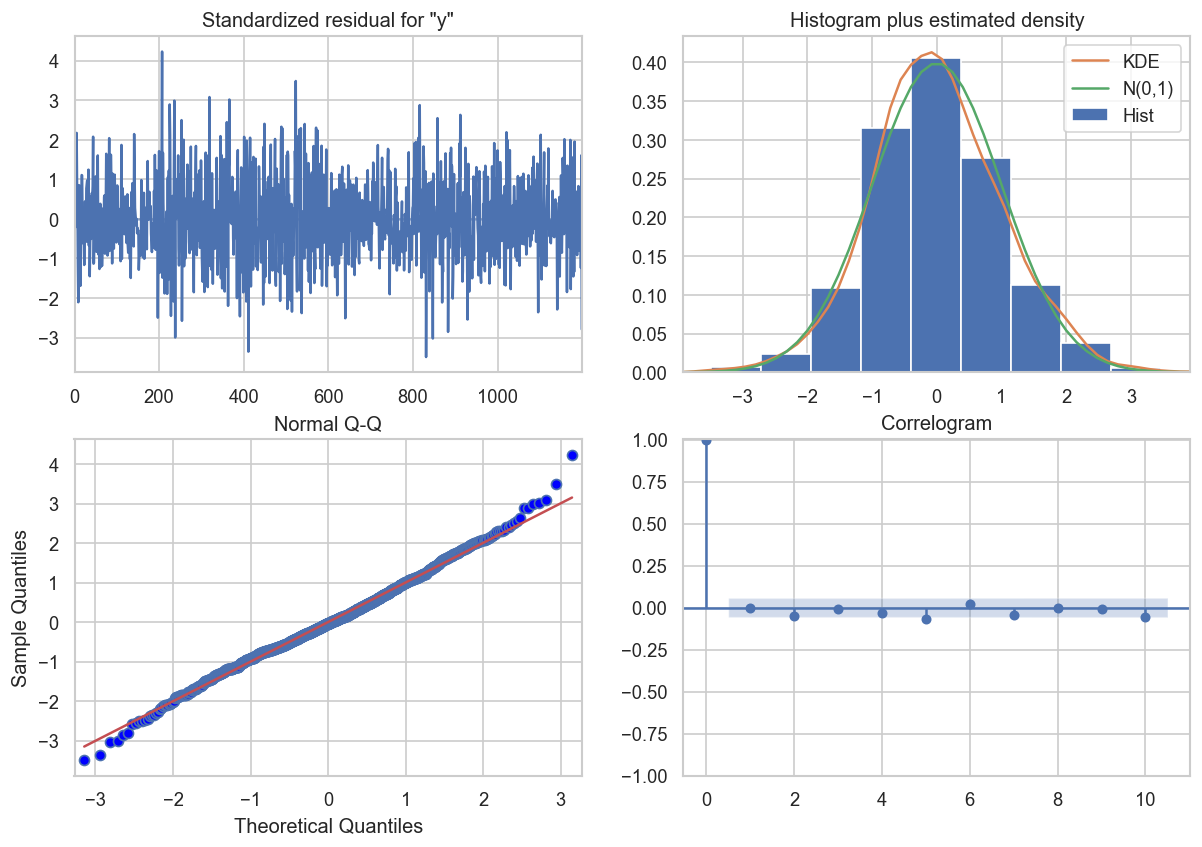

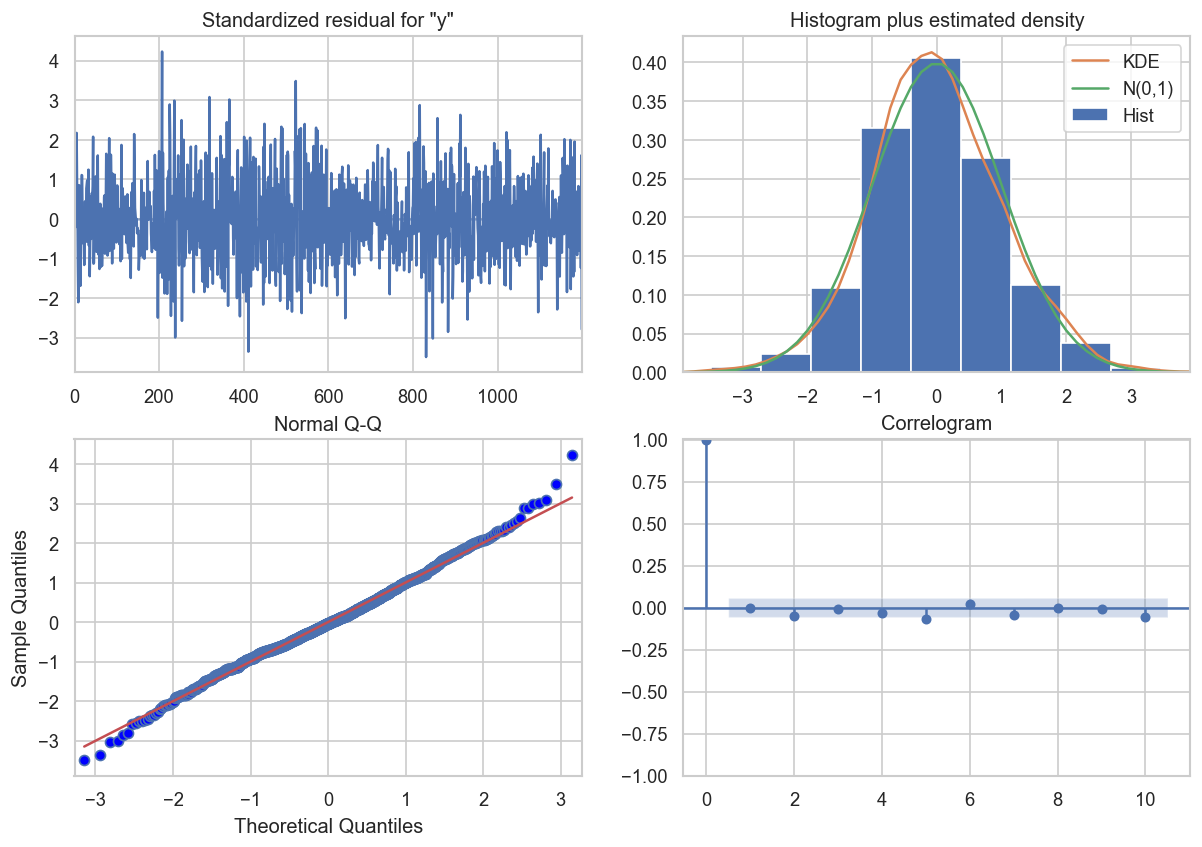

In [207]:
result2.plot_diagnostics()

In [204]:
#SARiMAX
use_data
arimax1 = sm.tsa.statespace.SARIMAX(target, exog = features, order = (6,0,4))
result3 = arimax1.fit()

MSE of training dataset is 0.008188343552256167
MSE of testing dataset is 0.11865344496666108


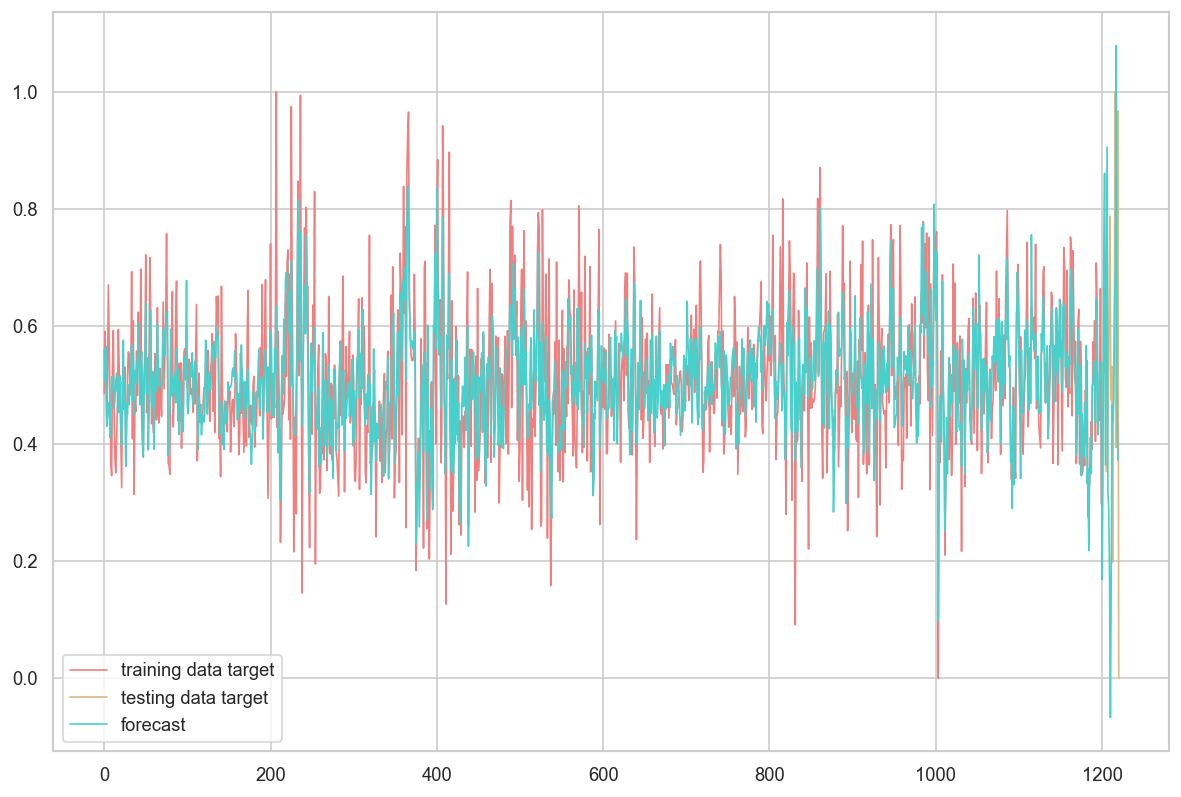

In [206]:
#pred2 = result1.predict(1,1220)
pred4 = result3.predict(start = 0, end = 1199 ,exog = features)
pred_test2 = result3.predict(start = 1200, end = 1219, exog = test_feat)
MSE_train3 = (mean_squared_error(pred4, target))
MSE_test3= (mean_squared_error(pred_test2, test_arima))
print('MSE of training dataset is', MSE_train3)
print('MSE of testing dataset is', MSE_test3)
all_train2 = target
all_pred2 = result3.predict(start= 0, end = 1219, exog = test_feat)

plt.plot(all_train2, color="lightcoral", linewidth=1.0, label=r"training data target")
plt.plot(np.linspace(1200,1220,20), test_arima, color="burlywood", linewidth=1.0, label=r"testing data target")
plt.plot(all_pred2, color="mediumturquoise", linewidth=1.0, label=r"forecast")
plt.legend(loc="best")
plt.show()
#plot
#print(result1.summary())
#value_p = pred2.values
#plt.plot(value_p)

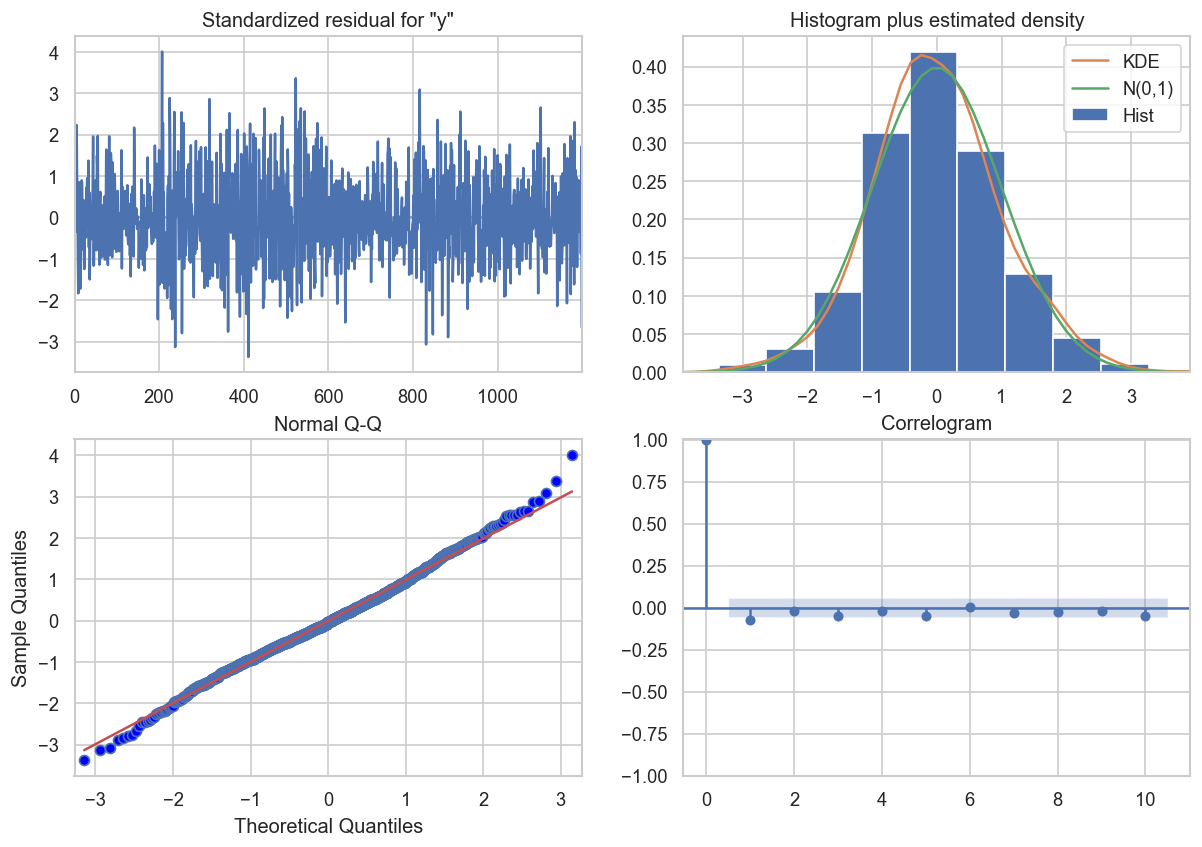

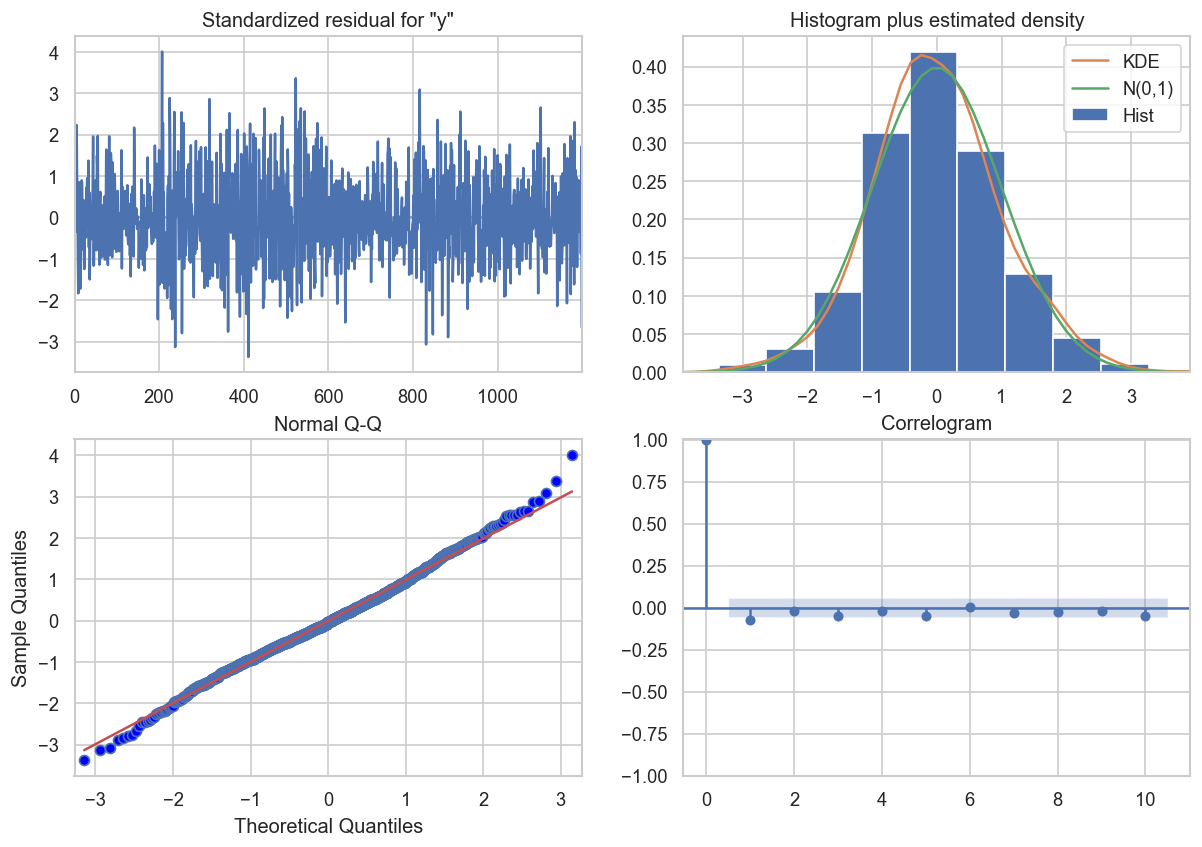

In [208]:
result3.plot_diagnostics()